# Finding motiflets

In [1]:
import pyattimo
import matplotlib.pyplot as plt
import time

First, we download the ECG dataset, and load the first 100k points

In [2]:
ts = pyattimo.load_dataset("ecg", 100000)

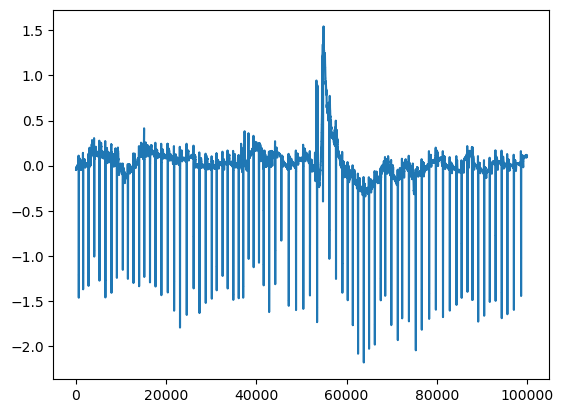

In [3]:
plt.plot(ts)

Then, we can find the motiflets of length 1000 for which there are 4 instances.

In [4]:
m = pyattimo.motiflet(ts, w=1000, support=4)

Computed hash values in 252.07168ms
next distance 1.6416776113397586
motiflets state: nearest neighbor entries: 2634 max neighbors: 4


We can plot it

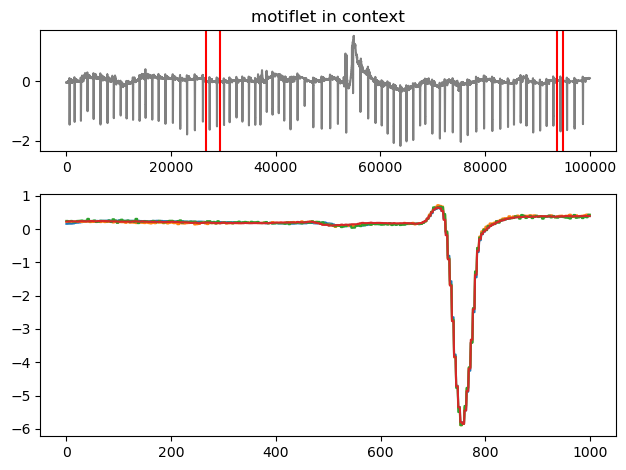

In [5]:
m.plot()

And we can inspect the indices of the sequences, including its extent

In [6]:
print(m)
print(m.extent)
print(m.indices)

motiflet: [94908, 26624, 29360, 93656] extent=1.4422938182235412
1.4422938182235412
[94908, 26624, 29360, 93656]


# Iterating over k-nearest neighborhoods

A more low level tool allows to obtain an iterator over the k-nearest neighborhoods of the subsequences: for a fixed $k$, the iterator returns subsequences, along with their $k$-nearest neighbors, by (approximately) increasing distance to their $k$-th nearest neighbor.

In [7]:
# first we set up the iterator
knn_iter = pyattimo.KnnIterator(ts, w=1000, k=5)

# then we extract as many neighborhoods as we like, like 5 in this case
start = time.time()
for i in range(5):
    print(next(knn_iter))
elapsed = time.time() - start
print("Elapsed time", elapsed, "seconds")

(98001, [84821, 75977, 28065, 48089, 19649], [1.3313465797032473, 1.3995833335361114, 1.6231784610642934, 1.6241525754538555, 1.6263575949966418])
(98003, [84823, 75979, 48091, 28067, 19651], [1.3299154459468745, 1.3998299424350602, 1.6224869922033556, 1.6236719391612255, 1.63031593072957])
(98004, [84824, 75980, 48092, 28068, 19652], [1.329195392077425, 1.3999522533275546, 1.6216524089986886, 1.6239112622463923, 1.6322538583809596])
(98005, [84825, 75981, 48093, 28069, 19653], [1.3285430647287038, 1.400108224092615, 1.620854208778095, 1.6235522369753923, 1.63540435207151])
(98006, [84826, 75982, 48094, 28070, 19654], [1.32788859227262, 1.4002637835287606, 1.620053998062362, 1.6231902842930195, 1.6385252062002345])
Elapsed time 1.8314149379730225 seconds


Computed hash values in 289.002398ms


Each call to the `next` function on the iterator returns a tuple of three elements:
- The id of the subsequence
- The ids of the k-nearest neighbors
- The distances to said neighbors

In [8]:
subseq_id, knn_ids, knn_dists = next(knn_iter)
print("subsequence ID", subseq_id)
print("knn IDs", knn_ids)
print("distances from `subseq_id`", knn_dists)

subsequence ID 98009
knn IDs [84829, 75985, 48097, 28073, 77617]
distances from `subseq_id` [1.3258345279036996, 1.4004800611705863, 1.6172624015188655, 1.6223586746641754, 1.6399231820433824]
